In [6]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_rain = pd.read_csv('./Hourly-Rainfall.csv')
df_rain

FileNotFoundError: [Errno 2] No such file or directory: './Hourly-Rainfall.csv'

In [ ]:
df_river = pd.read_csv('./Hourly-River-Level.csv')
df_river

,Date/Time,Level (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63
...,...,...
78817,2009-12-02 04:00:00,1.39
78818,2009-12-02 03:00:00,1.39
78819,2009-12-02 02:00:00,1.40
78820,2009-12-02 01:00:00,1.40


In [ ]:
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63
...,...,...,...,...
78845,2009-12-01 04:00:00,0.0,0.2,NaN
78846,2009-12-01 03:00:00,0.0,0.2,NaN
78847,2009-12-01 02:00:00,0.0,0.2,NaN
78848,2009-12-01 01:00:00,0.0,0.2,NaN


In [ ]:
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [ ]:
df.isnull().sum()

Date/Time                    0
Current rainfall (mm)        6
Cumulative rainfall (mm)     2
Level (m)                   25
dtype: int64

In [ ]:
df.dtypes

Date/Time                    object
Current rainfall (mm)       float64
Cumulative rainfall (mm)    float64
Level (m)                   float64
dtype: object

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date/Time', inplace=True)

df['Hour'] = df.index.hour
df['Hour']
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

In [ ]:
df = df.drop(columns=['Current rainfall (mm)'])
df

,Cumulative rainfall (mm),Level (m),Hour,Day,Month,Year
Date/Time,,,,,,
2018-12-02 18:00:00,0.0,NaN,18,2,12,2018
2018-12-02 17:00:00,0.0,1.61,17,2,12,2018
2018-12-02 16:00:00,0.0,1.61,16,2,12,2018
2018-12-02 15:00:00,0.0,1.62,15,2,12,2018
2018-12-02 14:00:00,0.0,1.63,14,2,12,2018
...,...,...,...,...,...,...
2009-12-01 04:00:00,0.2,NaN,4,1,12,2009
2009-12-01 03:00:00,0.2,NaN,3,1,12,2009
2009-12-01 02:00:00,0.2,NaN,2,1,12,2009


In [ ]:
df = df.fillna(0)
df

,Cumulative rainfall (mm),Level (m),Hour,Day,Month,Year
Date/Time,,,,,,
2018-12-02 18:00:00,0.0,0.00,18,2,12,2018
2018-12-02 17:00:00,0.0,1.61,17,2,12,2018
2018-12-02 16:00:00,0.0,1.61,16,2,12,2018
2018-12-02 15:00:00,0.0,1.62,15,2,12,2018
2018-12-02 14:00:00,0.0,1.63,14,2,12,2018
...,...,...,...,...,...,...
2009-12-01 04:00:00,0.2,0.00,4,1,12,2009
2009-12-01 03:00:00,0.2,0.00,3,1,12,2009
2009-12-01 02:00:00,0.2,0.00,2,1,12,2009


In [ ]:
X = df.drop(columns=['Level (m)'])
y = df['Level (m)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 0.0007736363792010146
Coefficient of Determination (R²): 0.9422246058761702


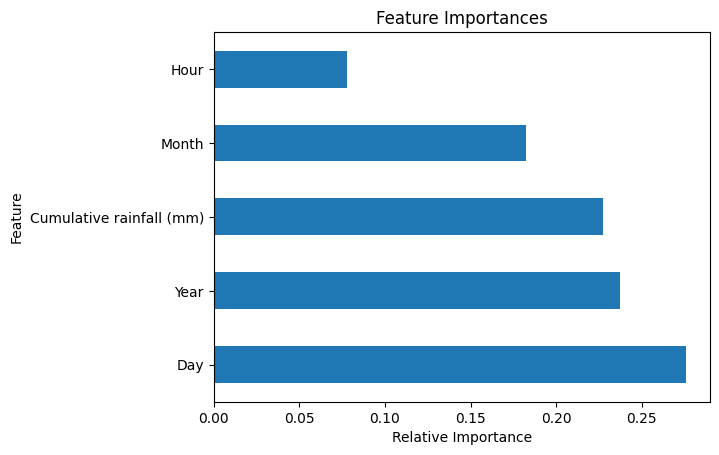

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

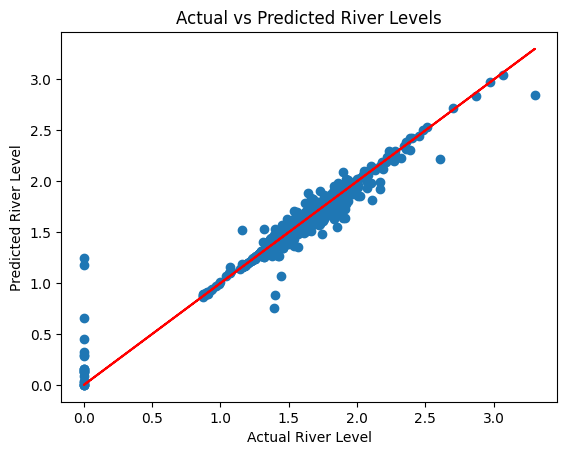

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted River Levels')
plt.xlabel('Actual River Level')
plt.ylabel('Predicted River Level')
plt.show()

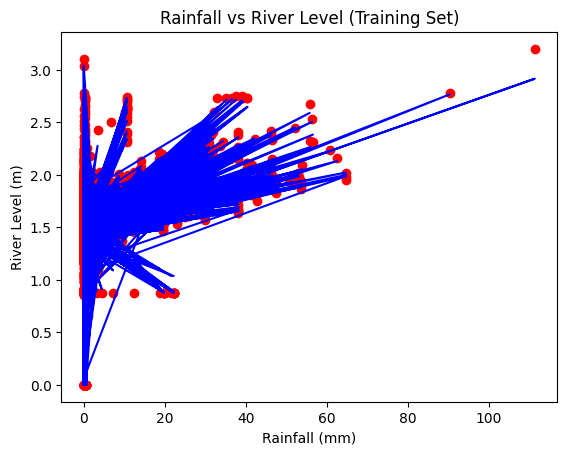

In [ ]:
plt.scatter(X_train['Cumulative rainfall (mm)'], y_train, color='red')
plt.plot(X_train['Cumulative rainfall (mm)'], rf.predict(X_train), color='blue')
plt.title('Rainfall vs River Level (Training Set)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Level (m)')
plt.show()

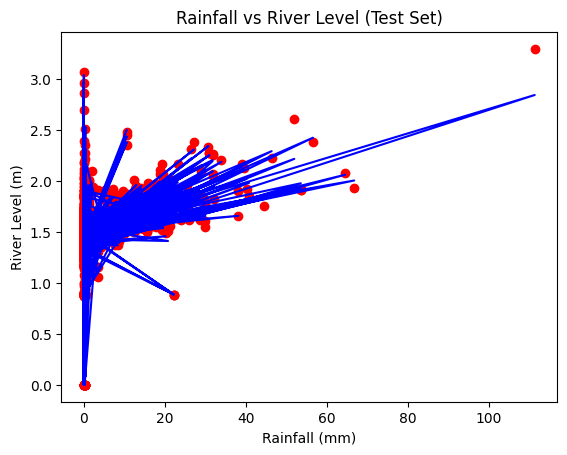

In [ ]:
plt.scatter(X_test['Cumulative rainfall (mm)'], y_test, color='red')
plt.plot(X_test['Cumulative rainfall (mm)'], rf.predict(X_test), color='blue')
plt.title('Rainfall vs River Level (Test Set)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Level (m)')
plt.show()

In [ ]:
date_input = input("Enter the date (YYYY-MM-DD): ")
time_input = input("Enter the time (HH:MM:SS): ")
year_input = input("Enter the year: ")

datetime_input = date_input + " " + time_input
datetime_obj = pd.to_datetime(datetime_input)

rainfall_input = input("Enter the rainfall amount in mm: ")
predicted_riverlevel = rf.predict([[float(rainfall_input), datetime_obj.hour, datetime_obj.day, datetime_obj.month, int(year_input)]])

print(predicted_riverlevel)
if (predicted_riverlevel > 1.7):
  print("FLOOD")
else:
  print("No FLOOD")

Enter the date (YYYY-MM-DD): 2023-04-26
Enter the time (HH:MM:SS): 19:00
Enter the year: 2023
Enter the rainfall amount in mm: 15
[1.797]
FLOOD


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 0.0005384613176918199
Coefficient of Determination (R²): 0.9606007977712445


In [ ]:
print('Train Score', rf.score(X_train,y_train))
print('Test Score', rf.score(X_test,y_test))

Train Score 0.9896915382893733
Test Score 0.9606007977712445


In [ ]:
import pickle
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)


NameError: name 'rf' is not defined